In [2]:
%matplotlib inline
import pandas as pd
from sodapy import Socrata
from uszipcode import SearchEngine # note this does an approximation of zipcode based upon a radius
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
import gmaps
import gmaps.datasets
# import pickle

In [3]:
# pd.options.display.max_columns=20

In [4]:
# client = Socrata("data.lacity.org", None)

# results = client.get("7fvc-faax", limit=2000000)
# # results = client.get("7fvc-faax", limit=200)

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

In [5]:
# # drop irrelevant columns
# results_df.drop(columns=[':@computed_region_2dna_qi2s',
#  ':@computed_region_k96s_3jcv',
#  ':@computed_region_kqwf_mjcx',
#  ':@computed_region_qz3q_ghft',
#  ':@computed_region_tatf_ua23',
#  ':@computed_region_ur2y_g4cx',
#  'crm_cd_1',
#  'crm_cd_2',
#  'crm_cd_3',
#  'crm_cd_4',                        
#  'cross_street'], inplace=True)

In [6]:
# results_df.head()

In [7]:
# with open('results_df.pickle', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(results_df, f, pickle.HIGHEST_PROTOCOL)

In [8]:
# with open('results_df.pickle', 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     results_df = pickle.load(f)

In [9]:
# list(results_df)

In [10]:
# rows=len(results_df)
# search = SearchEngine(simple_zipcode=True)
# lon = []
# lat = []
# zipcode = []
# year_single = '2000'
# year = []
# for i in range(rows):
#     # single values for readability
#     lattitude = float(results_df['location_1'][i]['coordinates'][1])
#     longitude = float(results_df['location_1'][i]['coordinates'][0])
#     year_single = results_df['date_occ'][i][:4]
#     # append to arrays
#     lon.append(longitude)
#     lat.append(lattitude)
#     try:
#         zipcode.append(search.by_coordinates(lattitude, longitude, radius=5, returns=1)[0].zipcode)
#     except:
#         zipcode.append('00000')
#         print(f'{i},{lattitude},{longitude}')
#     year.append(year_single)
# results_df['lat'] = lat
# results_df['lon'] = lon
# results_df['zipcode'] = zipcode
# results_df['year'] = year

In [11]:
# len(results_df)

In [12]:
# # remove lines with no corresponding zip code
# results_df = results_df[results_df.zipcode != '00000']
# len(results_df)

In [13]:
# results_df.head()

In [14]:
# results_df['zipcode']=pd.to_numeric(results_df.zipcode)
# results_df['year']=pd.to_numeric(results_df.year)
# results_df['crm_cd']=pd.to_numeric(results_df.crm_cd)

In [15]:
# # in case you want to keep run the data from the cvs file instead of the api
# file_name='Resources\los_angeles_crime_statistics.csv'
# results_df.to_csv(file_name, encoding='utf-8')

In [16]:
# if you have the csv file available and want to pull the data from the csv file, uncomment next line
results_df=pd.read_csv('Resources\los_angeles_crime_statistics.csv')

In [17]:
# Read income and housing data by zipcode csv file
zip_home_income=pd.read_csv('Resources\CA_zip_home_income.csv')
zip_home_income.head()

,Median Home Value,Median Household Income,Zip Code
0,249600.0,35097.0,90001
1,216100.0,31258.0,90002
2,231700.0,29686.0,90003
3,776300.0,37976.0,90004
4,633600.0,31893.0,90005


In [18]:
# Rename Zip Code column to zipcode
zip_home_income=zip_home_income.rename(columns = {"Zip Code":"zipcode"})
zip_home_income.head()

,Median Home Value,Median Household Income,zipcode
0,249600.0,35097.0,90001
1,216100.0,31258.0,90002
2,231700.0,29686.0,90003
3,776300.0,37976.0,90004
4,633600.0,31893.0,90005


In [19]:
# Join crime data, income and housing data on zipcode
results_merged = pd.merge(results_df,zip_home_income,on=["zipcode"], how = "left")

In [20]:
results_merged.head()

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_4,crm_cd_desc,date_occ,date_rptd,dr_no,location,...,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,...,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,...,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,...,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,...,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,...,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


In [21]:
results_df = results_merged

In [22]:
# FD: The analysis can only be as good as the underlying data
# https://www.latimes.com/local/crime/la-me-lapd-audit-20151206-story.html

In [23]:
# FD: Crime classifications, the good, the bad and the ugly
# Modernizing Crime Statistics: Report 1: Defining and Classifying Crime (2016)
# Chapter: 5 Proposed Classification of Crime for Statistical Purposes
# https://www.nap.edu/read/23492/chapter/7#121

In [24]:
# get all crime codes with description and validate it is a one to one code versus description
aggregation = { 
     'crm_cd_desc': 'nunique' 
}
crime_codes = results_df.groupby(['crm_cd','crm_cd_desc']).agg(aggregation)

#crime_codes.to_csv('crime codes.csv', encoding='utf-8')
# manual determination of violent crime as no indicator available to determine violent crime.
# The LA Times article describes violent crime as 'violent crime — which includes homicide, rape, robbery and aggravated assault'.
crime_codes

,,crm_cd_desc
crm_cd,crm_cd_desc,
110,CRIMINAL HOMICIDE,1
113,"MANSLAUGHTER, NEGLIGENT",1
121,"RAPE, FORCIBLE",1
122,"RAPE, ATTEMPTED",1
210,ROBBERY,1
220,ATTEMPTED ROBBERY,1
230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1
231,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1
235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,1


In [25]:
# general crime historical review ###############################################3

In [26]:
# remove 2019
processing_df = results_df.loc[results_df['year'] != 2019]

years = processing_df.year.unique()
years.sort
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [27]:
processing_df.head()

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_4,crm_cd_desc,date_occ,date_rptd,dr_no,location,...,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,...,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,...,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,...,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,...,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,...,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


In [28]:
# group by year / zipcode ; count number of crimes (dr_no)
zip_crime_intermediate = processing_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
zip_crime = zip_crime_intermediate.groupby(['zipcode']).agg(aggregation)
zip_crime = zip_crime.sort_values(by=['dr_no'], ascending=False)
zip_crime.reset_index(level=0, inplace=True)
zip_crime.head()

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [29]:
zip_crime_top = zip_crime[:5]
zip_crime_top

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [30]:
zip_crime.tail()

,zipcode,dr_no
229,91104,1
230,91105,1
231,91207,1
232,91354,1
233,93591,1


In [31]:
type(zip_crime.zipcode[0])

numpy.int64

In [32]:
# get top into array to process zipcodes for line plot
zip_top = zip_crime_top.zipcode.unique()
zip_top

array([90037, 90003, 90028, 90011, 90057], dtype=int64)

In [33]:
aggregation = { 
     'dr_no': 'nunique' 
}

zip_90037 = processing_df[processing_df.zipcode == 90037].groupby(['year','zipcode']).agg(aggregation)
zip_90003 = processing_df[processing_df.zipcode == 90003].groupby(['year','zipcode']).agg(aggregation)
zip_90028 = processing_df[processing_df.zipcode == 90028].groupby(['year','zipcode']).agg(aggregation)
zip_90011 = processing_df[processing_df.zipcode == 90011].groupby(['year','zipcode']).agg(aggregation)
zip_90057 = processing_df[processing_df.zipcode == 90057].groupby(['year','zipcode']).agg(aggregation)

# top_zips={zipcode:pd.DataFrame(processing_df[processing_df.type == zipcode].groupby(['year']).agg(aggregation)) for zipcode in zip_top} # works

In [34]:
zip_90037.reset_index(level=0, inplace=True)
zip_90003.reset_index(level=0, inplace=True)
zip_90028.reset_index(level=0, inplace=True)
zip_90011.reset_index(level=0, inplace=True)
zip_90057.reset_index(level=0, inplace=True)

# top_zips.reset_index(level=0, inplace=True)

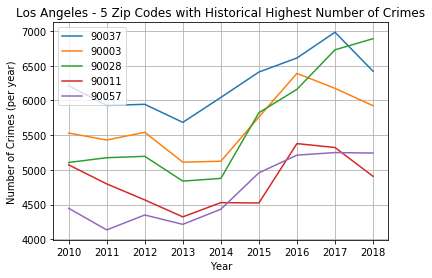

In [35]:
# plot lines
plot_90037 = plt.plot(zip_90037['year'],zip_90037['dr_no'],label=90037)
plot_90003 = plt.plot(zip_90003['year'],zip_90003['dr_no'],label=90003)
plot_90028 = plt.plot(zip_90028['year'],zip_90028['dr_no'],label=90028)
plot_90011 = plt.plot(zip_90011['year'],zip_90011['dr_no'],label=90011)
plot_90057 = plt.plot(zip_90057['year'],zip_90057['dr_no'],label=90057)
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes')
plt.legend()
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - 5 Zip Codes with Historical Highest Number of Violent Crimes.png")
# show plot
plt.show()

In [36]:
# chart review:
# - disproportionate increase for zip code 90028
# - 2018 from the top 5 crime perspective shows a general decrease of crime

In [37]:
# violent crime historical review ###############################################

In [38]:
# per initial list review with team member with history in law enforcement
violent_crime_list = [ 110, 113,121,122,210,220,230,231,235,236,250,251,434,435,436,451,753,821,860,910,920]
# type(violent_crime)

In [39]:
violent_crime_df = results_df[results_df["crm_cd"].isin(violent_crime_list)]
# remove 2019
violent_crime_df = violent_crime_df.loc[violent_crime_df['year'] != 2019]
violent_crime_df

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_4,crm_cd_desc,date_occ,date_rptd,dr_no,location,...,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
4,4,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,...,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0
5,5,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700720,4400 W WASHINGTON BL,...,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0
6,6,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-04-12T00:00:00.000,2010-04-12T00:00:00.000,100700734,CLOVERDALE AV,...,O,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0623,-118.3462,90036,2010,945000.0,71589.0
14,14,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-06-27T00:00:00.000,2010-06-27T00:00:00.000,100700892,1600 S HIGHLAND AV,...,B,F,KNIFE WITH BLADE 6INCHES OR LESS,200.0,34.0461,-118.3441,90019,2010,617300.0,42043.0
15,15,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-01T00:00:00.000,2010-07-01T00:00:00.000,100700898,4800 W WASHINGTON BL,...,W,M,STICK,308.0,34.0399,-118.3435,90019,2010,617300.0,42043.0
16,16,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-02T00:00:00.000,2010-07-02T00:00:00.000,100700902,WASHINGTON,...,O,M,HAND GUN,102.0,34.0399,-118.3398,90019,2010,617300.0,42043.0
19,19,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-15T00:00:00.000,2010-07-15T00:00:00.000,100700936,1500 MEADOWBROOK AV,...,W,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0465,-118.3510,90019,2010,617300.0,42043.0
21,21,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-05-13T00:00:00.000,2010-08-05T00:00:00.000,100700987,4000 W JOHNNIE COCH AV,...,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0418,-118.3269,90018,2010,345800.0,32447.0
22,22,7.0,Wilshire,230,NaN,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-08-19T00:00:00.000,2010-08-19T00:00:00.000,100701019,700 N LA CIENEGA BL,...,W,M,BOTTLE,212.0,34.0842,-118.3765,90069,2010,696700.0,75451.0
23,23,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-08-20T00:00:00.000,2010-08-20T00:00:00.000,100701021,400 N ROSSMORE AV,...,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0776,-118.3273,90038,2010,525800.0,35144.0


In [40]:
# group by violent crime 
violent_crime_desc_list_intermediate = violent_crime_df.sort_values(by=["crm_cd_desc"])
aggregation = { 
     'dr_no': 'count' 
}
violent_crime_desc_list = violent_crime_desc_list_intermediate.groupby(["crm_cd_desc"]).agg(aggregation)
violent_crime_desc_list = violent_crime_desc_list.sort_values(by=["dr_no"], ascending=False)
violent_crime_desc_list.reset_index(level=0, inplace=True)
violent_crime_desc_list = violent_crime_desc_list.head()
violent_crime_desc_list = violent_crime_desc_list.replace(',', '', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace('-', '', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace(' ', '_', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace('__', '_', regex=True)
violent_crime_desc_list


,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [41]:
# group by year / zipcode ; count number of crimes (dr_no)
zip_crime_v_intermediate = violent_crime_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
zip_crime_v = zip_crime_v_intermediate.groupby(['zipcode']).agg(aggregation)
zip_crime_v = zip_crime_v.sort_values(by=['dr_no'], ascending=False)
zip_crime_v.reset_index(level=0, inplace=True)
zip_crime_v.head()

,zipcode,dr_no
0,90037,11300
1,90003,9915
2,90011,8158
3,90057,7610
4,90062,7387


In [42]:
len(zip_crime_v)

169

In [43]:
zip_crime_top_v = zip_crime_v[:5]
zip_crime_top_v

,zipcode,dr_no
0,90037,11300
1,90003,9915
2,90011,8158
3,90057,7610
4,90062,7387


In [44]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
#Join together a single string of crime description
crime_type_desc = " ".join(crimedesc for crimedesc in results_df["crm_cd_desc"])
# #Create and generate a word cloud image
crime_desc_wordcloud_transparent = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(crime_type_desc)
crime_desc_wordcloud_black = WordCloud().generate(crime_type_desc)

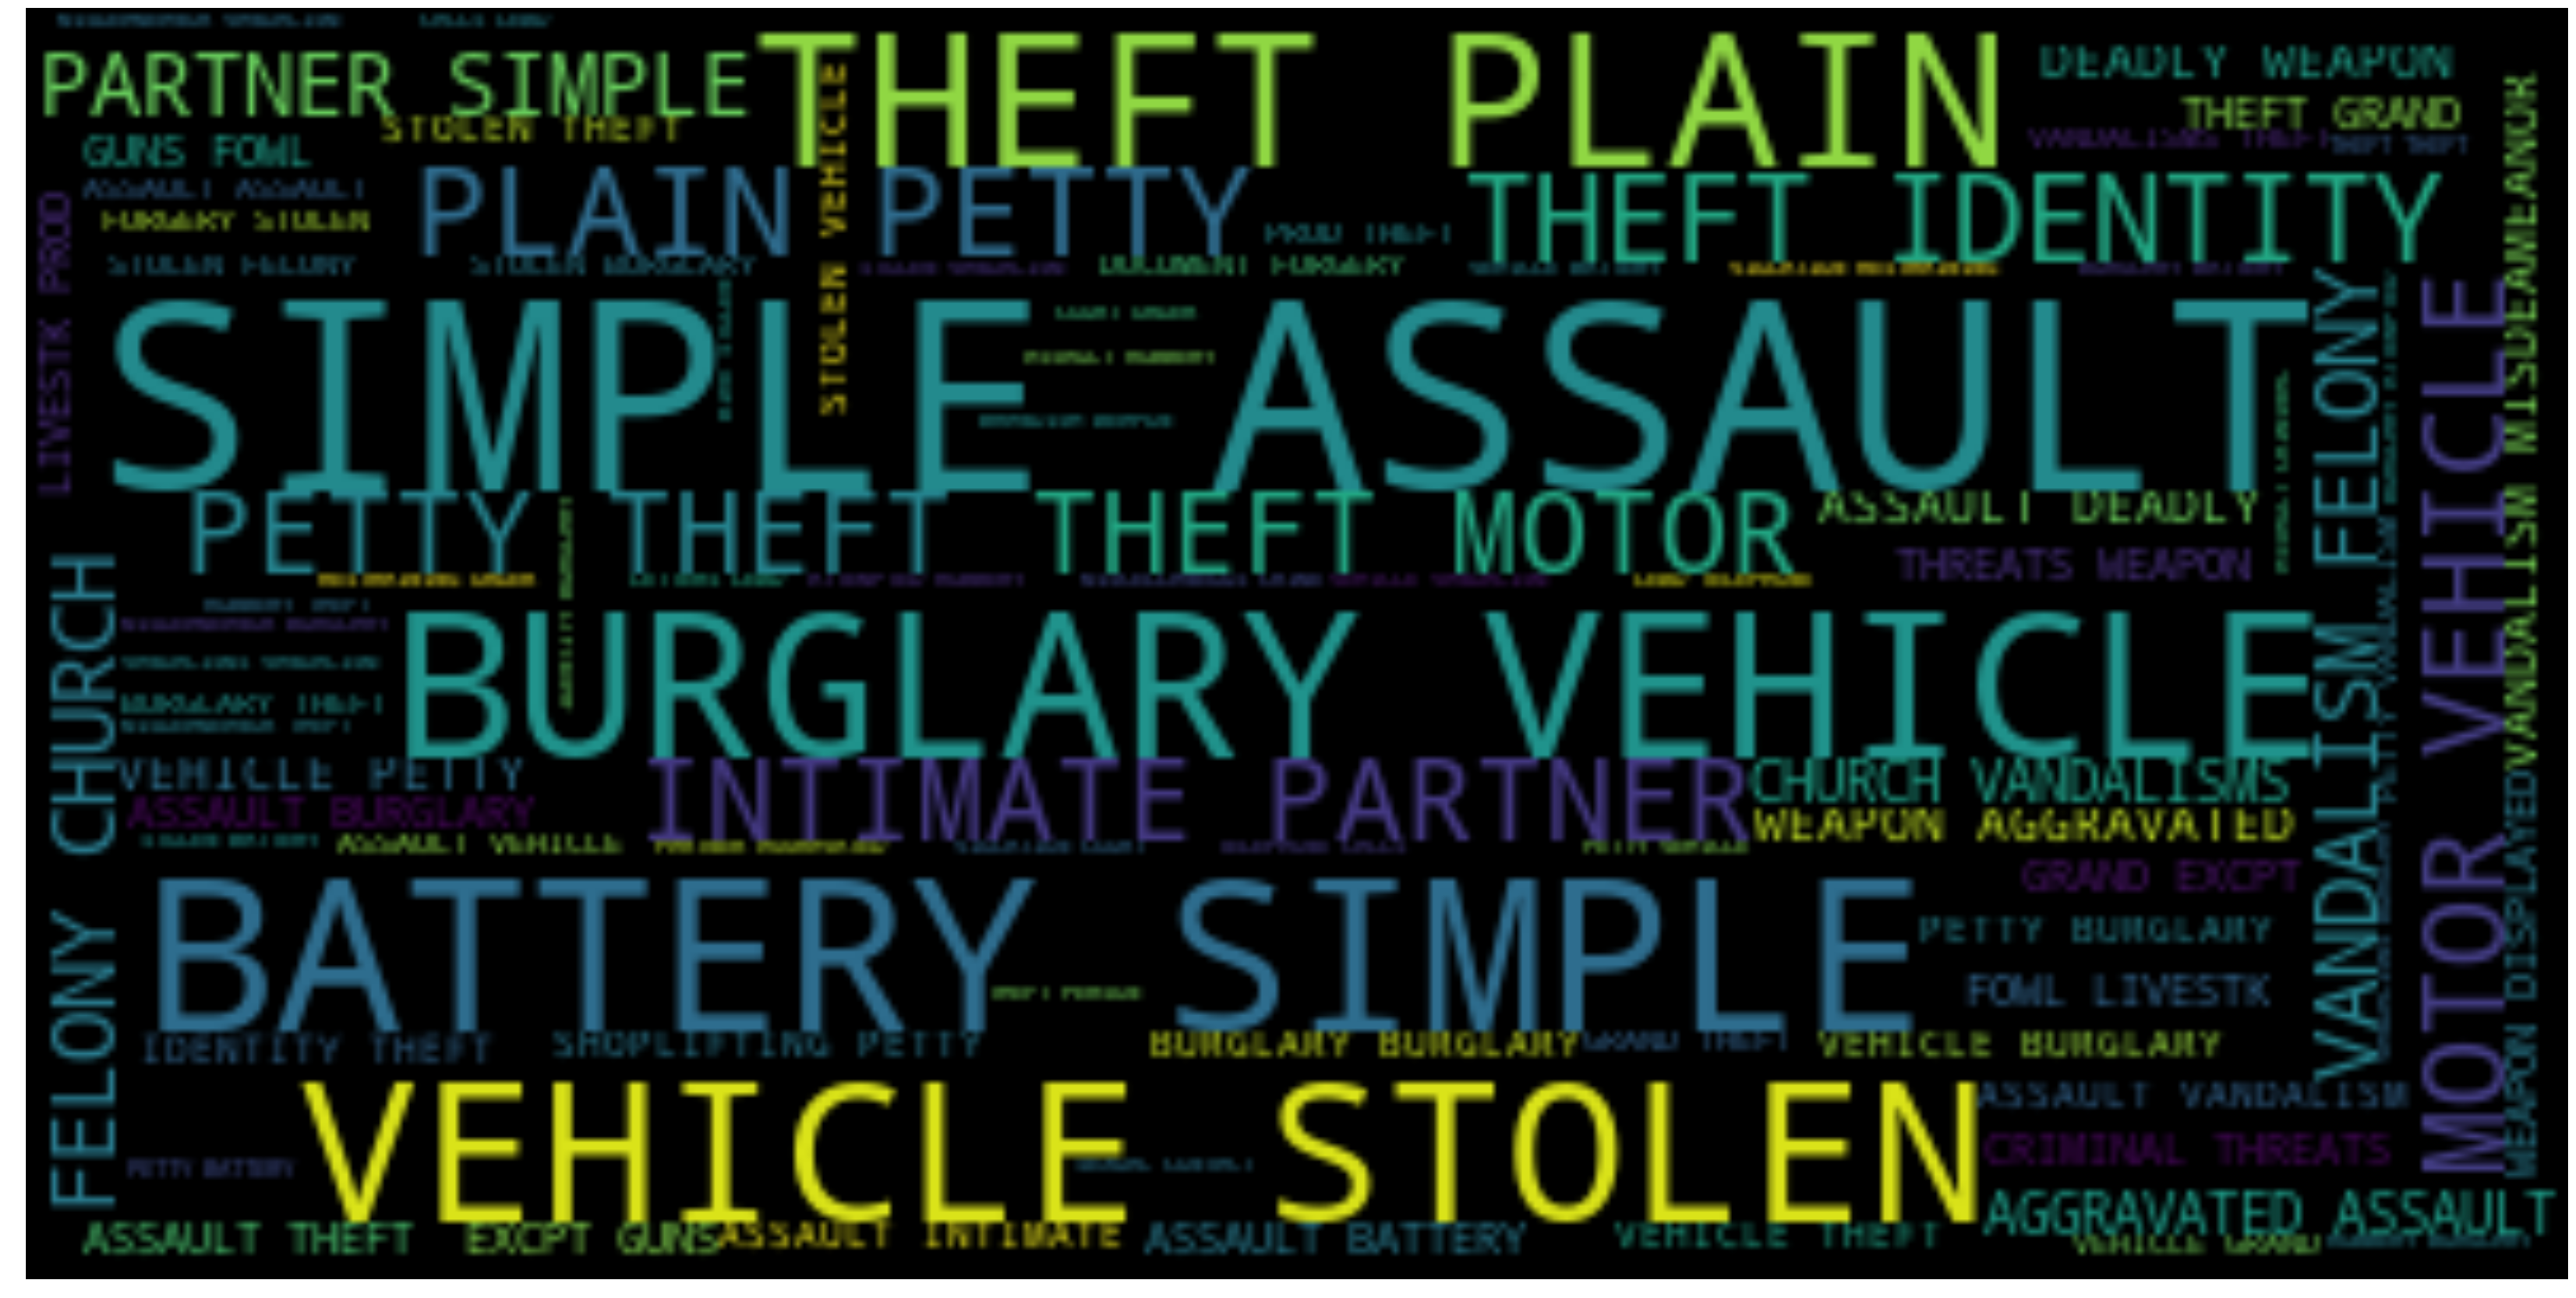

In [45]:
#Plot wordcloud image
plt.figure(figsize=[60,30])
plt.imshow(crime_desc_wordcloud_black,interpolation="bilinear")
plt.axis("off")

#Save image file
plt.savefig("Images/Crimedesc.png",format="png")

plt.show()

In [46]:
violent_crime_desc_list

,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [47]:
violent_crime_desc_list

,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [48]:
#Join together a single string of crime description
voilent_crime_desc_zip =[]
zip_crime_top_v_str = zip_crime_top_v
voilent_crime_desc_zip = " ".join(crimedesc for crimedesc in violent_crime_desc_list["crm_cd_desc"])
#zip_crime_top_v_str['zipcode']=  "CA_" + zip_crime_top_v_str['zipcode'].map(str)
#rows=len(zip_crime_top_v_str)
# for i in range(rows):
#     voilent_crime_desc_zip = voilent_crime_desc_zip + " " + "CA_" + rows["zipcode"].map(str)
#voilent_crime_desc_zip = " ".join(zip for zips in zip_crime_top_v_str["zipcode"])
# #Create and generate a word cloud image
voilent_crime_desc_zip_black = WordCloud().generate(voilent_crime_desc_zip)
#voilent_crime_desc_zip
#zip_crime_top_v_str

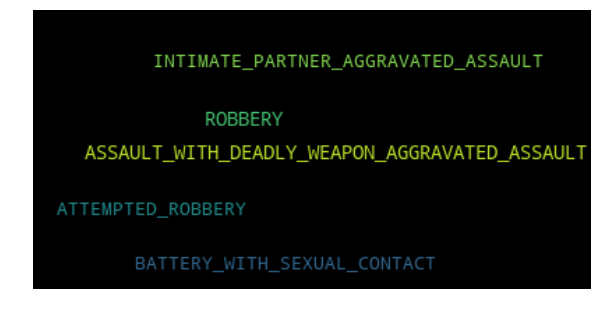

In [49]:
#Plot wordcloud image
plt.figure(figsize=[10,10])
plt.imshow(voilent_crime_desc_zip_black,interpolation="bilinear")
plt.axis("off")

#Save image file
plt.savefig("Images/Crimedesc-top5.png",format="png")

plt.show()

In [50]:
zip_crime_v.tail()

,zipcode,dr_no
164,90262,1
165,90740,1
166,90221,1
167,90805,1
168,93551,1


In [51]:
# get top into array to process zipcodes for line plot
zip_top_v = zip_crime_top_v.zipcode.unique()
zip_top_v

array([90037, 90003, 90011, 90057, 90062], dtype=int64)

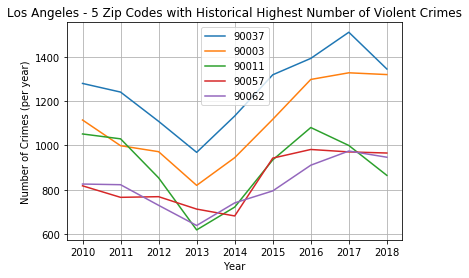

In [52]:
aggregation = { 
     'dr_no': 'nunique' 
}

zip_90037_v = violent_crime_df[violent_crime_df.zipcode == 90037].groupby(['year','zipcode']).agg(aggregation)
zip_90003_v = violent_crime_df[violent_crime_df.zipcode == 90003].groupby(['year','zipcode']).agg(aggregation)
zip_90011_v = violent_crime_df[violent_crime_df.zipcode == 90011].groupby(['year','zipcode']).agg(aggregation)
zip_90057_v = violent_crime_df[violent_crime_df.zipcode == 90057].groupby(['year','zipcode']).agg(aggregation)
zip_90062_v = violent_crime_df[violent_crime_df.zipcode == 90062].groupby(['year','zipcode']).agg(aggregation)

zip_90037_v.reset_index(level=0, inplace=True)
zip_90003_v.reset_index(level=0, inplace=True)
zip_90011_v.reset_index(level=0, inplace=True)
zip_90057_v.reset_index(level=0, inplace=True)
zip_90062_v.reset_index(level=0, inplace=True)

# plot lines
plot_90037_v = plt.plot(zip_90037_v['year'],zip_90037_v['dr_no'],label=90037)
plot_90003_v = plt.plot(zip_90003_v['year'],zip_90003_v['dr_no'],label=90003)
plot_90011_v = plt.plot(zip_90011_v['year'],zip_90011_v['dr_no'],label=90011)
plot_90057_v = plt.plot(zip_90057_v['year'],zip_90057_v['dr_no'],label=90057)
plot_90062_v = plt.plot(zip_90062_v['year'],zip_90062_v['dr_no'],label=90062)
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - 5 Zip Codes with Historical Highest Number of Violent Crimes')
plt.legend()
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes.png")
# show plot
plt.show()

In [53]:
# chart review:
# - 2018 from the top 5 crime perspective shows a general decrease of crime
# = top 5 zip code 90028 from an overall crime perspective is not in top 5 from a violent crime perspective

In [54]:
# violent crime historical review overall ###############################################

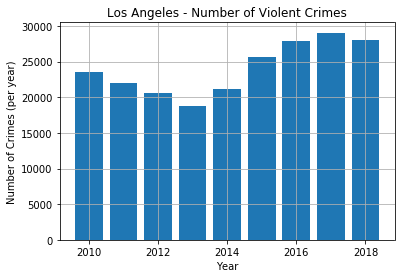

In [55]:
aggregation = { 
     'dr_no': 'nunique' 
}

overall_v = violent_crime_df.groupby(['year']).agg(aggregation)

overall_v.reset_index(level=0, inplace=True)

# plot lines
plot_overall_v = plt.bar(overall_v['year'],overall_v['dr_no'])
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - Number of Violent Crimes')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Overall Number of Violent Crimes.png")
# show plot
plt.show()

In [56]:
overall_v

,year,dr_no
0,2010,23571
1,2011,21999
2,2012,20585
3,2013,18722
4,2014,21191
5,2015,25586
6,2016,27943
7,2017,29045
8,2018,27991


In [57]:
vc_2018vs2017 = (( overall_v['dr_no'][8] / overall_v['dr_no'][7]  ) - 1 ) * 100
vc_2018vs2017

-3.6288517817180233

In [58]:
# chart review:
# - 2018 versus 2017 from an overall violent crime perspective: from 29,045 to 27,991: decrease of 3.63 %
#   In line with article 27,246 for 2018 and a decrease of near to 4 %
#   article: https://www.latimes.com/local/lanow/la-me-lapd-crime-stats-20181229-story.html
# - Note: additional analysis done on reporting in 2015 showing inaccurate / underreporting of violent crimes
#   article: https://www.latimes.com/local/cityhall/la-me-crime-stats-20151015-story.html
#            https://github.com/datadesk/lapd-crime-classification-analysis
# - Note: changing perceptions on use and distribution of drugs and legalization can impact numbers

In [59]:
# violent crime by zip code historical review overall ###############################################

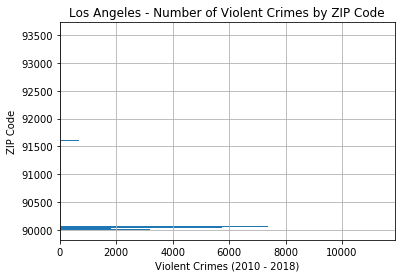

In [60]:
aggregation = { 
     'dr_no': 'nunique' 
}

zipcode_hist_v = violent_crime_df.groupby(['zipcode']).agg(aggregation)
zipcode_hist_v = zipcode_hist_v.sort_values(by=['dr_no'], ascending=True)
zipcode_hist_v.reset_index(level=0, inplace=True)

# plot lines
plot_zipcode_hist_v = plt.barh( zipcode_hist_v['zipcode'], zipcode_hist_v['dr_no'] )
# plot layout
plt.xlabel('Violent Crimes (2010 - 2018)')
plt.ylabel('ZIP Code')
plt.title('Los Angeles - Number of Violent Crimes by ZIP Code')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Number of Violent Crimes by ZIP Code.png")
# show plot
plt.show()
# to do: changes seemed to have had an impact

In [61]:
total_v =  zipcode_hist_v.sum(axis = 0, skipna = True).dr_no

In [62]:
zipcode_hist_v['perc'] = zipcode_hist_v['dr_no'] / total_v * 100
zipcode_hist_v = zipcode_hist_v.sort_values(by=['dr_no'], ascending=False)
zipcode_hist_v.reset_index(level=0, inplace=True)

# zipcode_hist_v

In [63]:
len(zipcode_hist_v)
total_10perc = 0
total_20perc = 0
i_10 = int(len(zipcode_hist_v) * 10 / 100) #10 %
i_20 = int(len(zipcode_hist_v) * 20 / 100) #20 %
counter=0
for index, row in zipcode_hist_v.iterrows():
    if counter < i_10:
        total_10perc = total_10perc + row.perc            
    if counter < i_20:
        total_20perc = total_20perc + row.perc
    counter = counter + 1

In [64]:
print(total_10perc)
print(total_20perc)

43.65678359252746
65.1872060120111


In [65]:
# the top 10 % of the zip codes account for 43.66 % of violent crime
# the top 20 % of the zip codes account for 65.19 % of violent crime

In [66]:
# violent crime by victim gender historical review overall ###############################################

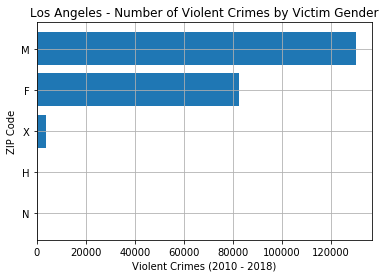

In [67]:
aggregation = { 
     'dr_no': 'nunique' 
}

vict_sex_hist_v = violent_crime_df.groupby(['vict_sex']).agg(aggregation)
vict_sex_hist_v = vict_sex_hist_v.sort_values(by=['dr_no'], ascending=True)
vict_sex_hist_v.reset_index(level=0, inplace=True)

# plot lines
plot_vict_sex_hist_v = plt.barh( vict_sex_hist_v['vict_sex'], vict_sex_hist_v['dr_no'] )
# plot layout
plt.xlabel('Violent Crimes (2010 - 2018)')
plt.ylabel('ZIP Code')
plt.title('Los Angeles - Number of Violent Crimes by Victim Gender')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Number of Violent Crimes by Victim Gender.png")
# show plot
plt.show()

In [68]:
total_vict_sex_v =  vict_sex_hist_v.sum(axis = 0, skipna = True).dr_no
vict_sex_hist_v['perc'] = vict_sex_hist_v['dr_no'] / total_vict_sex_v * 100

vict_sex_hist_v

,vict_sex,dr_no,perc
0,N,1,0.000462
1,H,14,0.006466
2,X,3636,1.679198
3,F,82641,38.165721
4,M,130240,60.148154


In [69]:
# expectation was to see a higher percentage of female victim violent crime, but graph and table show a 60.15% male victim of violent crime rate.

In [70]:
# violent crime by victim descent historical review overall ###############################################

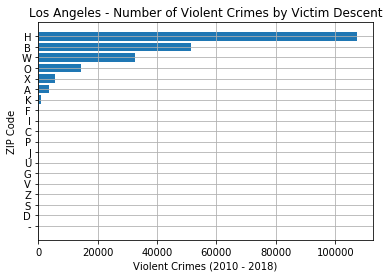

In [71]:
aggregation = { 
     'dr_no': 'nunique' 
}

vict_descent_hist_v = violent_crime_df.groupby(['vict_descent']).agg(aggregation)
vict_descent_hist_v = vict_descent_hist_v.sort_values(by=['dr_no'], ascending=True)
vict_descent_hist_v.reset_index(level=0, inplace=True)

# plot lines
plot_vict_descent_hist_v = plt.barh( vict_descent_hist_v['vict_descent'], vict_descent_hist_v['dr_no'] )
# plot layout
plt.xlabel('Violent Crimes (2010 - 2018)')
plt.ylabel('ZIP Code')
plt.title('Los Angeles - Number of Violent Crimes by Victim Descent')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Number of Violent Crimes by Victim Descent.png")
# show plot
plt.show()

In [72]:
total_vict_descent_v =  vict_descent_hist_v.sum(axis = 0, skipna = True).dr_no
vict_descent_hist_v['perc'] = vict_descent_hist_v['dr_no'] / total_vict_descent_v * 100

vict_descent_hist_v

,vict_descent,dr_no,perc
0,-,1,0.000462
1,D,1,0.000462
2,S,4,0.001847
3,Z,8,0.003695
4,V,10,0.004618
5,G,12,0.005542
6,U,14,0.006466
7,J,15,0.006928
8,P,19,0.008775
9,C,49,0.022630


In [73]:
# expected hispanic / black victims to be close: 49.56 % of violent crime victims are of hispanic descent

In [74]:
zip_income_housing_intermediate = processing_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count', 'Median Household Income': 'min','Median Home Value': 'min'
}
zip_income_housing = zip_income_housing_intermediate.groupby(['zipcode']).agg(aggregation)
zip_income_housing = zip_income_housing.sort_values(by=['dr_no'], ascending=False)
zip_income_housing.reset_index(level=0, inplace=True)
zip_income_housing.head()

,zipcode,dr_no,Median Household Income,Median Home Value
0,90037,56234,26796.0,271400.0
1,90003,50984,29686.0,231700.0
2,90028,50792,30953.0,593900.0
3,90011,43418,30171.0,269300.0
4,90057,42240,28035.0,282600.0


In [75]:
# income
# fig, axs = plt.subplots(ncols=3)
# fig.set_size_inches(20, 6)
# sns.distplot(zip_income_housing["dr_no"], bins=zip_income_housing["zipcode"], ax=axs[0])
# sns.distplot(zip_income_housing["Median Household Income"], bins=zip_income_housing["zipcode"], ax=axs[1])
# sns.distplot(zip_income_housing["Median Home Value"], bins=zip_income_housing["zipcode"], ax=axs[2])


# plt.close(2)
# plt.close(3)
# plt.close(4)
# plt.show()

# g = sns.catplot(x="zipcode", y="dr_no", 
#                  data=zip_income_housing, saturation=.5,
#                  kind="bar", ci=None, aspect=.6)
# (g.set_axis_labels("Zip Code", "Crime Count")
#    .set_xticklabels(zip_income_housing["zipcode"])
# #   .set_titles("{col_name} {col_var}")
# #   .set(ylim=(0, 1))
#    .despine(left=True))  
# plt.show()

In [76]:
processing_df.head() 

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_4,crm_cd_desc,date_occ,date_rptd,dr_no,location,...,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,...,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,...,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,...,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,...,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,...,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


In [77]:
# Calculate Top five crimes per year
if "COUNTER" in processing_df.columns:
    processing_df.drop(columns=["COUNTER"])

processing_df["COUNTER"] =1 
crimes_per_year_desc_intermediate = processing_df.sort_values(by=["year","crm_cd_desc"])
aggregation = { 
     "COUNTER": 'count' 
}
crimes_per_year_desc = crimes_per_year_desc_intermediate.groupby(["year","crm_cd_desc"]).agg(aggregation)
crimes_per_year_desc.reset_index(level=0, inplace=True)
crimes_per_year_desc_2010 = crimes_per_year_desc[crimes_per_year_desc.year == 2010].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2010 =crimes_per_year_desc_2010.head(5)
crimes_per_year_desc_2011 = crimes_per_year_desc[crimes_per_year_desc.year == 2011].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2011 =crimes_per_year_desc_2011.head(5)
crimes_per_year_desc_2012 = crimes_per_year_desc[crimes_per_year_desc.year == 2012].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2012 =crimes_per_year_desc_2012.head(5)
crimes_per_year_desc_2013 = crimes_per_year_desc[crimes_per_year_desc.year == 2013].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2013 =crimes_per_year_desc_2013.head(5)
crimes_per_year_desc_2014 = crimes_per_year_desc[crimes_per_year_desc.year == 2014].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2014 =crimes_per_year_desc_2014.head(5)
crimes_per_year_desc_2015 = crimes_per_year_desc[crimes_per_year_desc.year == 2015].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2015 =crimes_per_year_desc_2015.head(5)
crimes_per_year_desc_2016 = crimes_per_year_desc[crimes_per_year_desc.year == 2016].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2016 =crimes_per_year_desc_2016.head(5)
crimes_per_year_desc_2017 = crimes_per_year_desc[crimes_per_year_desc.year == 2017].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2017 =crimes_per_year_desc_2017.head(5)
crimes_per_year_desc_2018 = crimes_per_year_desc[crimes_per_year_desc.year == 2018].sort_values(by=["COUNTER"], ascending=False)
top_crimes_per_year_desc_2018 =crimes_per_year_desc_2018.head(5)
explode = (0.1,0, 0,0,0)
colors=["Gold","LightSkyBlue","LightCoral","Yellow","Blue"]



C:\Users\khano\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


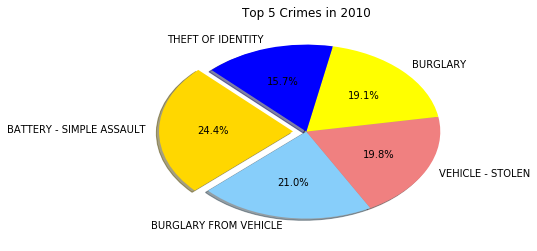

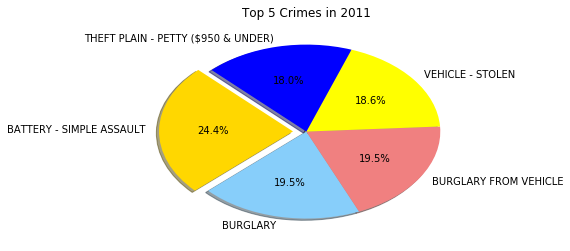

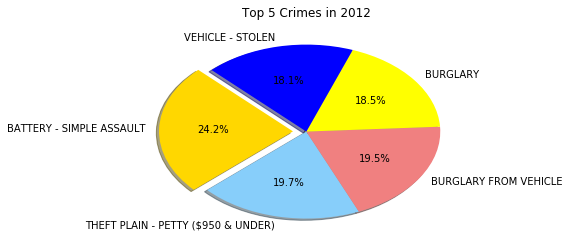

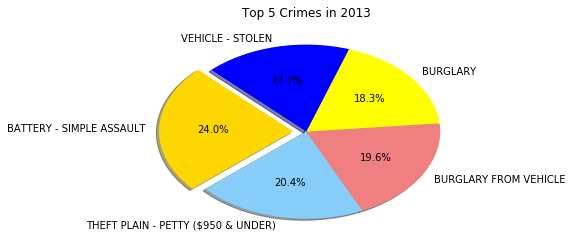

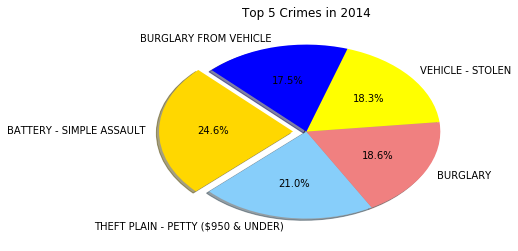

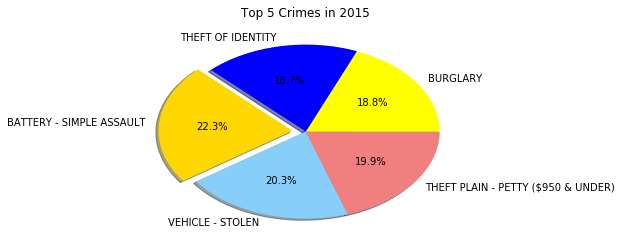

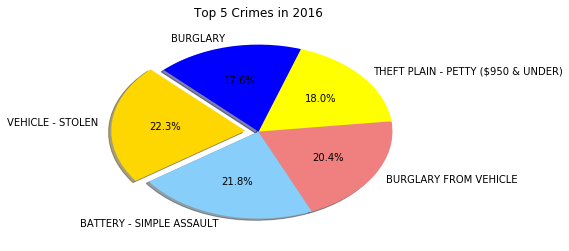

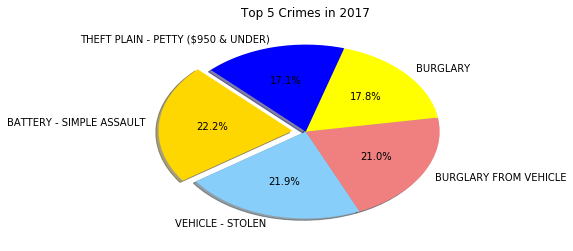

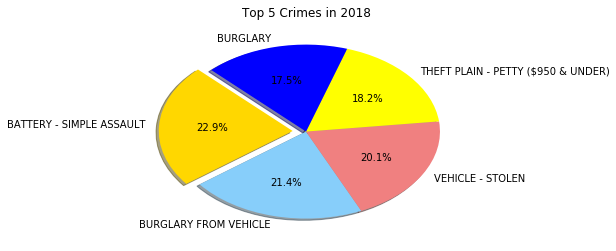

In [78]:
# # Build Pie Chart
# #matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)[source]
for i in range(2010,2019):
    data_year = i
    if i == 2010:
        plt.pie(top_crimes_per_year_desc_2010.COUNTER, labels = top_crimes_per_year_desc_2010.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)       
#         plt.legend( loc = 'right', labels=['%s, %1.1f %%' % (l, s) for l, s in top_crimes_per_year_desc_2010(top_crimes_per_year_desc_2010.index, top_crimes_per_year_desc_2010.COUNTER)])
#         plt.legend(top_crimes_per_year_desc_2010.COUNTER, top_crimes_per_year_desc_2010.index, loc="right")
    elif i == 2011:
        plt.pie(top_crimes_per_year_desc_2011.COUNTER, labels = top_crimes_per_year_desc_2011.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2012:
        plt.pie(top_crimes_per_year_desc_2012.COUNTER, labels = top_crimes_per_year_desc_2012.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2013:
        plt.pie(top_crimes_per_year_desc_2013.COUNTER, labels = top_crimes_per_year_desc_2013.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2014:
        plt.pie(top_crimes_per_year_desc_2014.COUNTER, labels = top_crimes_per_year_desc_2014.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2015:
        plt.pie(top_crimes_per_year_desc_2015.COUNTER, labels = top_crimes_per_year_desc_2015.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2016:
        plt.pie(top_crimes_per_year_desc_2016.COUNTER, labels = top_crimes_per_year_desc_2016.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    elif i == 2017:
        plt.pie(top_crimes_per_year_desc_2017.COUNTER, labels = top_crimes_per_year_desc_2017.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    else:
        plt.pie(top_crimes_per_year_desc_2018.COUNTER, labels = top_crimes_per_year_desc_2018.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)
    plt.title(f"Top 5 Crimes in {data_year}")
# # Save Figure
    plt.savefig(f"Images/Top 5 Crimes in {data_year}.png")
    plt.show()

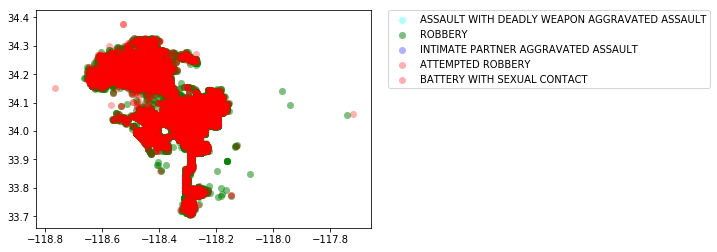

In [79]:
# Top Crime on Longitude and Latitude
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT'], results_df['lat'][results_df['crm_cd_desc']=='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ROBBERY'], results_df['lat'][results_df['crm_cd_desc']=='ROBBERY'], s=50, alpha=0.5, color='g', lw=0, label='ROBBERY')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='INTIMATE PARTNER AGGRAVATED ASSAULT'], results_df['lat'][results_df['crm_cd_desc']=='INTIMATE PARTNER AGGRAVATED ASSAULT'], s=50, alpha=0.3, color='b', lw=0, label='INTIMATE PARTNER AGGRAVATED ASSAULT')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ATTEMPTED ROBBERY'], results_df['lat'][results_df['crm_cd_desc']=='ATTEMPTED ROBBERY'], s=50, alpha=0.3, color='r', lw=0, label='ATTEMPTED ROBBERY')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='BATTERY WITH SEXUAL CONTACT'], results_df['lat'][results_df['crm_cd_desc']=='BATTERY WITH SEXUAL CONTACT'], s=50, alpha=0.3, color='r', lw=0, label='BATTERY WITH SEXUAL CONTACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# # Save Figure
plt.savefig(f"Images/Top Crime on Longitude Latitude axes.png")
plt.show()

In [89]:
if "new_date_column" in processing_df.columns:
    processing_df.drop(columns=["new_date_column"])
if "day_of_week" in processing_df.columns:
    processing_df.drop(columns=["day_of_week"])
processing_df["date_occ"] = pd.to_datetime(processing_df["date_occ"])
processing_df["new_date_column"] = processing_df["date_occ"].dt.date
processing_df.head(5)
processing_df.new_date_column = pd.to_datetime(processing_df.new_date_column)
#processing_df.index = pd.DatetimeIndex(processing_df.new_date_column)
processing_df.head(5)

C:\Users\khano\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\khano\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\khano\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_4,crm_cd_desc,date_occ,date_rptd,dr_no,location,...,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income,COUNTER,new_date_column,day_of_week
new_date_column,,,,,,,,,,,,,,,,,,,,,
2010-03-12,0,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,...,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0,1,2010-03-12,Friday
2010-03-13,1,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,...,400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0,1,2010-03-13,Saturday
2010-03-23,2,7.0,Wilshire,930,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,...,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0,1,2010-03-23,Tuesday
2010-03-23,3,7.0,Wilshire,626,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,...,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0,1,2010-03-23,Tuesday
2010-04-05,4,7.0,Wilshire,236,NaN,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,...,400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0,1,2010-04-05,Monday


In [90]:
processing_df["day_of_week"] = processing_df["new_date_column"].dt.day_name()
# processing_df.index = pd.DatetimeIndex(processing_df["new_date_column"])
# processing_df["new_date_column","day_of_week"].head(10)

C:\Users\khano\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


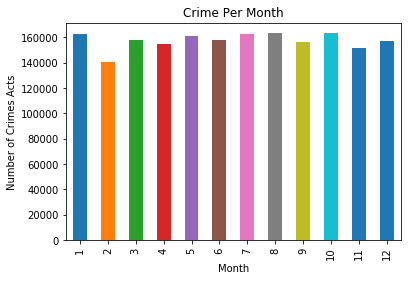

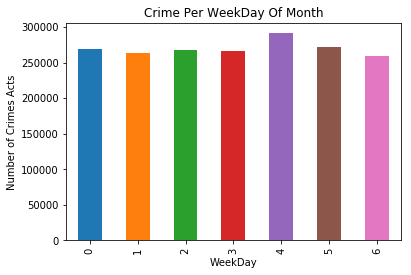

In [91]:
#make graph of crimes per month
processing_df.groupby([processing_df.index.month]).size().plot.bar()
plt.title("Crime Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Acts")
plt.savefig(f"Images/Crime Per Month.png")
plt.show()
#graph of crimes per day
processing_df.groupby([processing_df.index.weekday]).size().plot.bar()
#processing_df.sort_values([processing_df.index.weekday]).groupby([processing_df.day_of_week]).size().plot.bar()
plt.title("Crime Per WeekDay Of Month")
plt.xlabel("WeekDay")
#plt.legend(f"{processing_df.index.weekday}-{processing_df.index.weekday}")
plt.ylabel("Number of Crimes Acts")
plt.savefig(f"Images/Crime Per WeekDay Of Month.png")
plt.show()

In [92]:
# Use google maps api
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close
gmaps.configure(api_key=api_key) 
los_angeles_coordinates = (34.0522, -118.2437) # Fill in with your API key
# #Get the locations from the data set
locations = processing_df[processing_df.year == 2018][["lat", "lon"]]
# #Get the magnitude from the data
weights = processing_df[processing_df.year == 2018]["COUNTER"]
# #Set up your map
fig = gmaps.figure(center=los_angeles_coordinates, zoom_level=10)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig
#plt.savefig(f"Images/Peace Discruption-HeatMap-2018.png")

Figure(layout=FigureLayout(height='420px'))